# SVM using Acoustic features

In [1]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('OpenSmile_Acoustic_DATA.csv')

df.fillna(0, inplace=True)

df.head()

,frameTime,pcm_RMSenergy_sma_max,pcm_RMSenergy_sma_min,pcm_RMSenergy_sma_range,pcm_RMSenergy_sma_maxPos,pcm_RMSenergy_sma_minPos,pcm_RMSenergy_sma_amean,pcm_RMSenergy_sma_linregc1,pcm_RMSenergy_sma_linregc2,pcm_RMSenergy_sma_linregerrQ,...,F0_sma_de_maxPos,F0_sma_de_minPos,F0_sma_de_amean,F0_sma_de_linregc1,F0_sma_de_linregc2,F0_sma_de_linregerrQ,F0_sma_de_stddev,F0_sma_de_skewness,F0_sma_de_kurtosis,label
0,0,0.013430,0.000315,0.013115,62,31,0.002099,0.000036,0.000259,0.000014,...,62,71,-4.850182e-08,-0.020856,1.053219,170.07320,13.055660,0.139536,13.962990,D
1,0,0.012014,0.000097,0.011916,86,24,0.001798,-0.000005,0.002335,0.000010,...,57,112,9.946342e-09,-0.019791,1.998919,156.33080,12.556900,1.408134,28.568980,D
2,0,0.017445,0.000102,0.017343,87,766,0.002201,-0.000004,0.003788,0.000006,...,597,601,-4.064229e-08,-0.002775,1.064037,679.20410,26.068800,0.078041,5.901169,D
3,0,0.065849,0.003651,0.062198,46,1,0.009701,-0.000070,0.013960,0.000150,...,42,47,2.071429e-08,-0.011110,0.672133,234.11950,15.305970,0.073403,11.027760,D
4,0,0.036867,0.002773,0.034093,145,15,0.005615,0.000016,0.003674,0.000040,...,129,154,-7.481755e-09,-0.004885,0.581368,87.16737,9.342429,1.363256,33.537700,D


In [6]:
columns = df.columns.tolist()

features = [f for f in filter(lambda x: x not in ['label', 'frameTime'], columns)]
target = ['label']

feature_df = df[features]

X = np.asarray(feature_df)

y = np.asarray(df['label'])


In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)

X = scaler.transform(X)

In [9]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=4)

X_train.shape

(3233, 384)

In [15]:
from sklearn import svm

classifier = svm.SVC(kernel='rbf',C=0.1, gamma=1)

classifier.fit(X_train, y_train)

y_predict = classifier.predict(X_test)

In [16]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           D       0.00      0.00      0.00       106
          ND       0.71      1.00      0.83       254

   micro avg       0.71      0.71      0.71       360
   macro avg       0.35      0.50      0.41       360
weighted avg       0.50      0.71      0.58       360



C:\Users\Ashwin Ram\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.7055555555555556

# SVM using glottal features

In [2]:
import pandas as pd
import numpy as np

In [66]:
df = pd.read_csv('Glottal features.csv')

df.fillna(0, inplace=True)

In [67]:
columns = df.columns.tolist()
from numpy import nan
features = [f for f in filter(lambda x: x not in ['Label', 'frameTime'], columns)]
target = ['Label']

feature_df = df[features].replace(0, nan)
feature_df.fillna(feature_df.sum(), inplace=True)

X = np.asarray(feature_df)

y = np.asarray(df['Label'])
feature_df.head()


,OQ1,OQ2,NAQ,AQ,ClQ,OQa,QOQ,SQ1,SQ2,DH12,PSP,HRF
0,13.472685,10.142316,0.991781,0.006941,7.703431,2.417849,4.889335,15.031153,6.548111,21.701640,9.005336,-10.397435
1,0.812903,0.646946,0.153377,0.002528,0.415674,0.405545,0.488987,0.965098,0.532640,21.698599,0.275154,0.924383
2,13.472685,10.142316,0.991781,0.006941,7.703431,2.417849,4.889335,15.031153,6.548111,23.301822,9.005336,-8.691624
3,0.710072,0.476530,0.077525,0.001359,0.344136,0.220149,0.140251,0.980445,0.671318,19.577620,0.350059,6.190404
4,13.472685,10.142316,0.991781,0.006941,7.703431,2.417849,4.889335,15.031153,6.548111,20.080114,9.005336,-9.621048


In [68]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)

X = scaler.transform(X)

In [69]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=4)

X_train.shape

(181, 12)

In [70]:
from sklearn import svm

classifier = svm.SVC(kernel='rbf',C=10, gamma=0.1)

classifier.fit(X_train, y_train)

y_predict = classifier.predict(X_test)

In [71]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           1       1.00      0.25      0.40         8
           2       0.68      1.00      0.81        13

   micro avg       0.71      0.71      0.71        21
   macro avg       0.84      0.62      0.61        21
weighted avg       0.80      0.71      0.66        21



In [72]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.7142857142857143

# SVM using feature extracted from PCA

In [81]:
numpy.savetxt("pca.csv", a, delimiter=",")

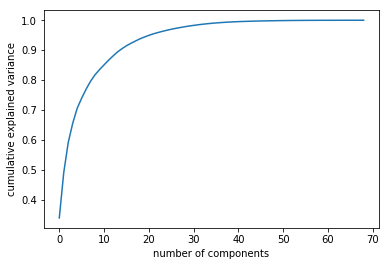

In [60]:
pca=PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [ ]:
#plt.figure(flagsize=(1,0))
#plt.scatter(X_pca[1,0],X_pca[1,0],d1)
#plt.xlabel('number of components')
#plt.ylabel('cumulative explained variance')

In [96]:
df = pd.read_csv("pca.csv")
df.fillna(0, inplace=True)

In [97]:
columns = df.columns.tolist()
from numpy import nan
features = [f for f in filter(lambda x: x not in ['Label', 'frameTime'], columns)]
target = ['Label']

feature_df = df[features].replace(0, nan)
feature_df.fillna(feature_df.sum(), inplace=True)

X = np.asarray(feature_df)

y = np.asarray(df['Label'])
feature_df.head()

,AQ_kurt,AQ_max,AQ_mean,AQ_median,AQ_min,AQ_skew,AQ_std,ClQ_kurt,ClQ_max,ClQ_mean,...,NAQ_min,NAQ_skew,NAQ_std,OQ1_kurt,OQ1_max,OQ1_mean,OQ1_median,OQ1_min,OQ1_skew,OQ1_std
0,-0.105,4.040,5.720,0.396,-6.690,8.030,-4.4800,3.840,-0.0586,1.3700,...,-0.6930,-0.463,-0.96600,-0.3270,-1.2700,0.608,-1.070000,0.2550,-0.1020,-0.62500
1,11.500,0.173,-0.662,0.436,0.322,-0.311,-0.5860,0.225,-0.5020,0.2830,...,0.1550,0.183,0.00799,0.0498,-0.1390,0.105,-0.026000,-0.1480,0.2150,0.15900
2,-2.980,0.519,-5.140,1.130,-0.131,-0.744,-0.0157,0.180,-1.8000,-0.0531,...,0.0493,-0.421,-0.62400,-0.2580,-0.4720,-0.738,0.144000,-0.0845,-0.5560,0.10200
3,1.600,-2.130,-3.330,-0.643,-0.957,1.530,4.7100,1.440,1.4200,-1.6000,...,0.3230,0.272,-0.20700,0.1250,0.4720,-0.502,0.620000,0.0931,0.1860,0.11700
4,11.800,0.713,-0.774,0.481,0.129,-0.757,-0.3160,-0.233,0.8170,0.9260,...,-0.0194,-0.103,0.02070,-0.0748,-0.0805,0.178,0.000565,-0.0733,-0.0262,0.00923


In [98]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)

X = scaler.transform(X)

In [99]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=4)

X_train.shape

(180, 30)

In [172]:
from sklearn import svm

classifier = svm.SVC(C=0.1, gamma=0.1, kernel='linear')

classifier.fit(X_train, y_train)

y_predict = classifier.predict(X_test)

In [173]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      0.89      0.94         9

   micro avg       0.95      0.95      0.95        21
   macro avg       0.96      0.94      0.95        21
weighted avg       0.96      0.95      0.95        21



In [174]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.9523809523809523

# SequentialFeatureSelector

In [64]:
df = pd.read_csv('final1.csv')

df.fillna(0, inplace=True)

df.head()
df.size

97768

In [65]:
df.head()

,Unnamed: 0,frameTime,pcm_RMSenergy_sma_max,pcm_RMSenergy_sma_min,pcm_RMSenergy_sma_range,pcm_RMSenergy_sma_maxPos,pcm_RMSenergy_sma_minPos,pcm_RMSenergy_sma_amean,pcm_RMSenergy_sma_linregc1,pcm_RMSenergy_sma_linregc2,...,PCA20,PCA21,PCA22,PCA23,PCA24,PCA25,PCA26,PCA27,PCA28,PCA29
0,0,0,0.010374,0.000102,0.010271,82,149,0.002477,-3.260000e-06,0.002743,...,-0.6930,-0.463,-0.96600,-0.3270,-1.2700,0.608,-1.070000,0.2550,-0.1020,-0.62500
1,1,0,0.008003,0.000108,0.007896,88,5,0.001813,5.450000e-06,0.001394,...,0.1550,0.183,0.00799,0.0498,-0.1390,0.105,-0.026000,-0.1480,0.2150,0.15900
2,2,0,0.011478,0.000100,0.011378,83,194,0.003527,-2.220000e-06,0.003756,...,0.0493,-0.421,-0.62400,-0.2580,-0.4720,-0.738,0.144000,-0.0845,-0.5560,0.10200
3,3,0,0.005419,0.000100,0.005319,109,206,0.001289,4.160000e-07,0.001246,...,0.3230,0.272,-0.20700,0.1250,0.4720,-0.502,0.620000,0.0931,0.1860,0.11700
4,4,0,0.011950,0.000100,0.011850,79,31,0.002273,9.090000e-06,0.001574,...,-0.0194,-0.103,0.02070,-0.0748,-0.0805,0.178,0.000565,-0.0733,-0.0262,0.00923


In [66]:
columns = df.columns.tolist()

features = [f for f in filter(lambda x: x not in ['label', 'frameTime','filename'], columns)]
target = ['label']

feature_df = df[features]

X = np.asarray(feature_df)

y = np.asarray(df['label'])


In [67]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(feature_df, df['label'], test_size=0.1, random_state=4)

X_train.shapefrom sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)

X = scaler.transform(X)

In [68]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(feature_df, df['label'], test_size=0.1, random_state=4)

X_train.shape

(181, 481)

<img src="sequentialModelDiagram.png">

In [91]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.svm import SVC 
classifier = SVC(gamma='auto', C=10)
# Sequential Forward Selection(sfs)
feature_selector = SFS(SVC(kernel='rbf', C=1000, gamma='auto'),
           k_features=20,
           forward=True,
           verbose=2,
           scoring='roc_auc',
           cv=4)

In [92]:
feature_selector.fit(X_train, y_train)
feature_selector.k_feature_idx_  

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 481 out of 481 | elapsed:   14.0s finished

[2020-11-22 12:37:03] Features: 1/20 -- score: 1.0[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed:    6.3s finished

[2020-11-22 12:37:09] Features: 2/20 -- score: 1.0[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 479 out of 479 | elapsed:    6.3s finished

[2020-11-22 12:37:16] Features: 3/20 -- score: 1.0[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:  

(0, 1, 2, 3, 6, 7, 8, 9, 10, 11, 12, 13, 15, 18, 19, 20, 22, 23, 24, 30)

In [93]:
filtered_features= df[features].columns[list(feature_selector.k_feature_idx_)]
filtered_features

Index(['Unnamed: 0', 'pcm_RMSenergy_sma_max', 'pcm_RMSenergy_sma_min',
       'pcm_RMSenergy_sma_range', 'pcm_RMSenergy_sma_amean',
       'pcm_RMSenergy_sma_linregc1', 'pcm_RMSenergy_sma_linregc2',
       'pcm_RMSenergy_sma_linregerrQ', 'pcm_RMSenergy_sma_stddev',
       'pcm_RMSenergy_sma_skewness', 'pcm_RMSenergy_sma_kurtosis',
       'pcm_fftMag_mfcc_sma[1]_max', 'pcm_fftMag_mfcc_sma[1]_range',
       'pcm_fftMag_mfcc_sma[1]_amean', 'pcm_fftMag_mfcc_sma[1]_linregc1',
       'pcm_fftMag_mfcc_sma[1]_linregc2', 'pcm_fftMag_mfcc_sma[1]_stddev',
       'pcm_fftMag_mfcc_sma[1]_skewness', 'pcm_fftMag_mfcc_sma[1]_kurtosis',
       'pcm_fftMag_mfcc_sma[2]_amean'],
      dtype='object')

In [100]:
from sklearn import svm


classifier = svm.SVC(kernel='rbf',gamma="auto",C=100)

classifier.fit(X_train[filtered_features], y_train)

y_predict = classifier.predict(X_test[filtered_features])

In [101]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      0.77      0.87        13
           1       0.73      1.00      0.84         8

   micro avg       0.86      0.86      0.86        21
   macro avg       0.86      0.88      0.86        21
weighted avg       0.90      0.86      0.86        21



In [102]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.8571428571428571